In [104]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/respiratory-sound-database/demographic_info.txt
/kaggle/input/respiratory-sound-database/Respiratory_Sound_Database/Respiratory_Sound_Database/patient_diagnosis.csv
/kaggle/input/respiratory-sound-database/Respiratory_Sound_Database/Respiratory_Sound_Database/filename_format.txt
/kaggle/input/respiratory-sound-database/Respiratory_Sound_Database/Respiratory_Sound_Database/filename_differences.txt
/kaggle/input/respiratory-sound-database/Respiratory_Sound_Database/Respiratory_Sound_Database/audio_and_txt_files/168_1b1_Al_sc_Meditron.txt
/kaggle/input/respiratory-sound-database/Respiratory_Sound_Database/Respiratory_Sound_Database/audio_and_txt_files/162_1b2_Ar_mc_AKGC417L.wav
/kaggle/input/respiratory-sound-database/Respiratory_Sound_Database/Respiratory_Sound_Database/audio_and_txt_files/172_1b4_Ar_mc_AKGC417L.txt
/kaggle/input/respiratory-sound-database/Respiratory_Sound_Database/Respiratory_Sound_Database/audio_and_txt_files/193_1b2_Pl_mc_AKGC417L.wav
/kaggle/input/resp

In [105]:
import os

import wave
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt

from IPython.display import Audio

import librosa
import librosa.display


In [106]:
audio_data = '/kaggle/input/respiratory-sound-database/Respiratory_Sound_Database/Respiratory_Sound_Database/audio_and_txt_files/'
patient_data=pd.read_csv('/kaggle/input/respiratory-sound-database/Respiratory_Sound_Database/Respiratory_Sound_Database/patient_diagnosis.csv',names=['pid','disease'])
diagnosis_df = pd.read_csv('../input/respiratory-sound-database/Respiratory_Sound_Database/Respiratory_Sound_Database/patient_diagnosis.csv', names=['patient_id', 'disease'])
diagnosis_df.head(4)

,patient_id,disease
0,101,URTI
1,102,Healthy
2,103,Asthma
3,104,COPD


In [107]:
example_txt = audio_data + '104_1b1_Al_sc_Litt3200.txt'

with open(example_txt, 'r') as file:
    lines = file.readlines()

for line in lines:
    print(line.strip())


0	1.8771	0	0
1.8771	3.7543	0	0
3.7543	6.1071	0	0
6.1071	8.2502	0	0
8.2502	12.618	0	0
12.618	15.856	0	0


In [108]:
print (diagnosis_df.disease.value_counts())
print ('')
print (diagnosis_df.disease.value_counts(normalize=True) *100)

disease
COPD              64
Healthy           26
URTI              14
Bronchiectasis     7
Pneumonia          6
Bronchiolitis      6
LRTI               2
Asthma             1
Name: count, dtype: int64

disease
COPD              50.793651
Healthy           20.634921
URTI              11.111111
Bronchiectasis     5.555556
Pneumonia          4.761905
Bronchiolitis      4.761905
LRTI               1.587302
Asthma             0.793651
Name: proportion, dtype: float64


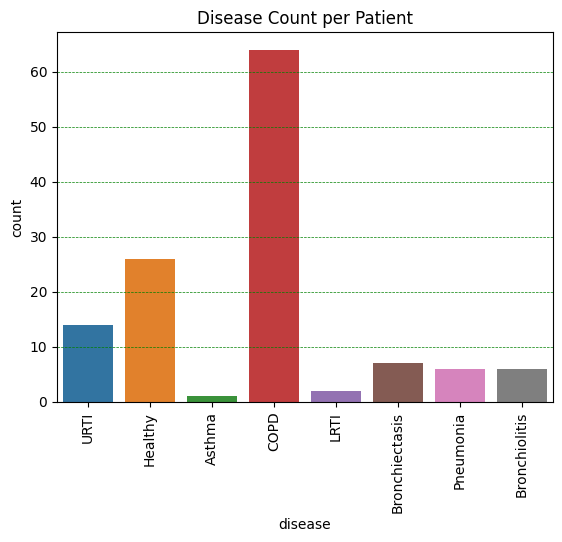

In [109]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='disease', data=diagnosis_df)
plt.grid(axis='y', color='green', linestyle='--', linewidth=0.5)
plt.xticks(rotation=90)
plt.title("Disease Count per Patient")
plt.show()


In [110]:
path='/kaggle/input/respiratory-sound-database/Respiratory_Sound_Database/Respiratory_Sound_Database/audio_and_txt_files/'
files=[s.split('.')[0] for s in os.listdir(path) if '.txt' in s]
files[:10]

['168_1b1_Al_sc_Meditron',
 '172_1b4_Ar_mc_AKGC417L',
 '130_3p2_Pr_mc_AKGC417L',
 '177_2b4_Pl_mc_AKGC417L',
 '130_2p5_Pl_mc_AKGC417L',
 '109_1b1_Pr_sc_Litt3200',
 '170_1b2_Pr_mc_AKGC417L',
 '147_2b3_Lr_mc_AKGC417L',
 '102_1b1_Ar_sc_Meditron',
 '158_1p3_Pr_mc_AKGC417L']

In [111]:
def add_noise(data,x):
    noise = np.random.randn(len(data))
    data_noise = data + x * noise
    return data_noise

def shift(data,x):
    return np.roll(data, x)

def stretch(data, rate):
    data = librosa.effects.time_stretch(data, rate)
    return data

def pitch_shift (data , rate):
    data = librosa.effects.pitch_shift(data, sr=220250, n_steps=rate)
    return data

In [112]:
def show_audio(audio_path):
    y, sr = librosa.load(audio_path)
    y_noise = add_noise(y , 0.0008)
    y_shift = shift(y,3200)
    y_stretch_1 = stretch(y, 1.2)
    y_stretch_2 = stretch(y, 0.8)
    y_pitch_shift = pitch_shift(y, 3)
    
    plt.figure(figsize=(20, 8))
    
    plt.subplot(3,2,1)
    librosa.display.waveshow(y, sr=sr)
    plt.title('orginal')

    plt.subplot(3,2,2)
    librosa.display.waveshow(y_noise, sr=sr)
    plt.title('noise')

    plt.subplot(3,2,3)
    librosa.display.waveshow(y_shift, sr=sr)
    plt.title('shift')
    
    plt.subplot(3,2,4)
    librosa.display.waveshow(y_stretch_1, sr=sr)
    plt.title('stretch 1')
    
    plt.subplot(3,2,5)
    librosa.display.waveshow(y_stretch_2, sr=sr)
    plt.title('stretch 2')
    
    plt.subplot(3,2,6)
    librosa.display.waveshow(y_pitch_shift, sr=sr)
    plt.title('pitch shift')

    plt.tight_layout()

In [113]:
def show_audio_features(audio_path):
    y, sr = librosa.load(audio_path)
    y_noise = add_noise(y , 0.0008)
    y_shift = shift(y,3200)
    y_stretch_1 = stretch(y, 1.2)
    y_stretch_2 = stretch(y, 0.8)
    y_pitch_shift = pitch_shift(y, 3)
    
    y = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=50)
    y_noise = librosa.feature.mfcc(y=y_noise, sr=sr, n_mfcc=50)
    y_shift = librosa.feature.mfcc(y=y_shift, sr=sr, n_mfcc=50)
    y_stretch_1 = librosa.feature.mfcc(y=y_stretch_1, sr=sr, n_mfcc=50)
    y_stretch_2 = librosa.feature.mfcc(y=y_stretch_2, sr=sr, n_mfcc=50)
    y_pitch_shift = librosa.feature.mfcc(y=y_pitch_shift, sr=sr, n_mfcc=50)
    
    plt.figure(figsize=(20, 8))
    
    plt.subplot(3,2,1)
    librosa.display.specshow(librosa.power_to_db(y,ref=np.max),
                             y_axis='mel',
                             fmax=8000,
                             x_axis='time')
    plt.colorbar(format='%+2.0f dB')
    plt.title('orginal')

    plt.subplot(3,2,2)
    librosa.display.specshow(librosa.power_to_db(y_noise,ref=np.max),
                             y_axis='mel',
                             fmax=8000,
                             x_axis='time')
    plt.colorbar(format='%+2.0f dB')
    plt.title('noise')

    plt.subplot(3,2,3)
    librosa.display.specshow(librosa.power_to_db(y_shift,ref=np.max),
                             y_axis='mel',
                             fmax=8000,
                             x_axis='time')
    plt.colorbar(format='%+2.0f dB')
    plt.title('shift')
    
    plt.subplot(3,2,4)
    librosa.display.specshow(librosa.power_to_db(y_stretch_1,ref=np.max),
                             y_axis='mel',
                             fmax=8000,
                             x_axis='time')
    plt.colorbar(format='%+2.0f dB')
    plt.title('stretch 1')
    
    plt.subplot(3,2,5)
    librosa.display.specshow(librosa.power_to_db(y_stretch_2,ref=np.max),
                             y_axis='mel',
                             fmax=8000,
                             x_axis='time')
    plt.colorbar(format='%+2.0f dB')
    plt.title('stretch 2')
    
    plt.subplot(3,2,6)
    librosa.display.specshow(librosa.power_to_db(y_pitch_shift,ref=np.max),
                             y_axis='mel',
                             fmax=8000,
                             x_axis='time')
    plt.colorbar(format='%+2.0f dB')
    plt.title('pitch shift')
    
    

    plt.tight_layout()

In [114]:
import numpy as np
import librosa
import librosa.display
import matplotlib.pyplot as plt

def add_noise(data, noise_level):
    noise = np.random.randn(len(data))
    return data + noise_level * noise

def shift(data, shift_value):
    return np.roll(data, shift_value)

def stretch(data, rate):
    stft = librosa.stft(data)
    stft_stretch = librosa.phase_vocoder(stft, rate=rate, hop_length=512)
    return librosa.istft(stft_stretch, hop_length=512)

def pitch_shift(data, sr, rate):
    return librosa.effects.pitch_shift(data, sr=sr, n_steps=rate)

def show_audio(audio_path):
    y, sr = librosa.load(audio_path)
    
    # Augmentations
    y_noise = add_noise(y, 0.0008)
    y_shift = shift(y, 3200)
    y_stretch_1 = stretch(y, 1.2)
    y_stretch_2 = stretch(y, 0.8)
    y_pitch_shift = pitch_shift(y, sr, 3)
    
    # Plot
    plt.figure(figsize=(20, 10))
    
    plt.subplot(3, 2, 1)
    librosa.display.waveshow(y, sr=sr)
    plt.title('Original')

    plt.subplot(3, 2, 2)
    librosa.display.waveshow(y_noise, sr=sr)
    plt.title('Add Noise')

    plt.subplot(3, 2, 3)
    librosa.display.waveshow(y_shift, sr=sr)
    plt.title('Shifted')

    plt.subplot(3, 2, 4)
    librosa.display.waveshow(y_stretch_1, sr=sr)
    plt.title('Time Stretch 1.2x')

    plt.subplot(3, 2, 5)
    librosa.display.waveshow(y_stretch_2, sr=sr)
    plt.title('Time Stretch 0.8x')

    plt.subplot(3, 2, 6)
    librosa.display.waveshow(y_pitch_shift, sr=sr)
    plt.title('Pitch Shift +3')

    plt.tight_layout()
    plt.show()


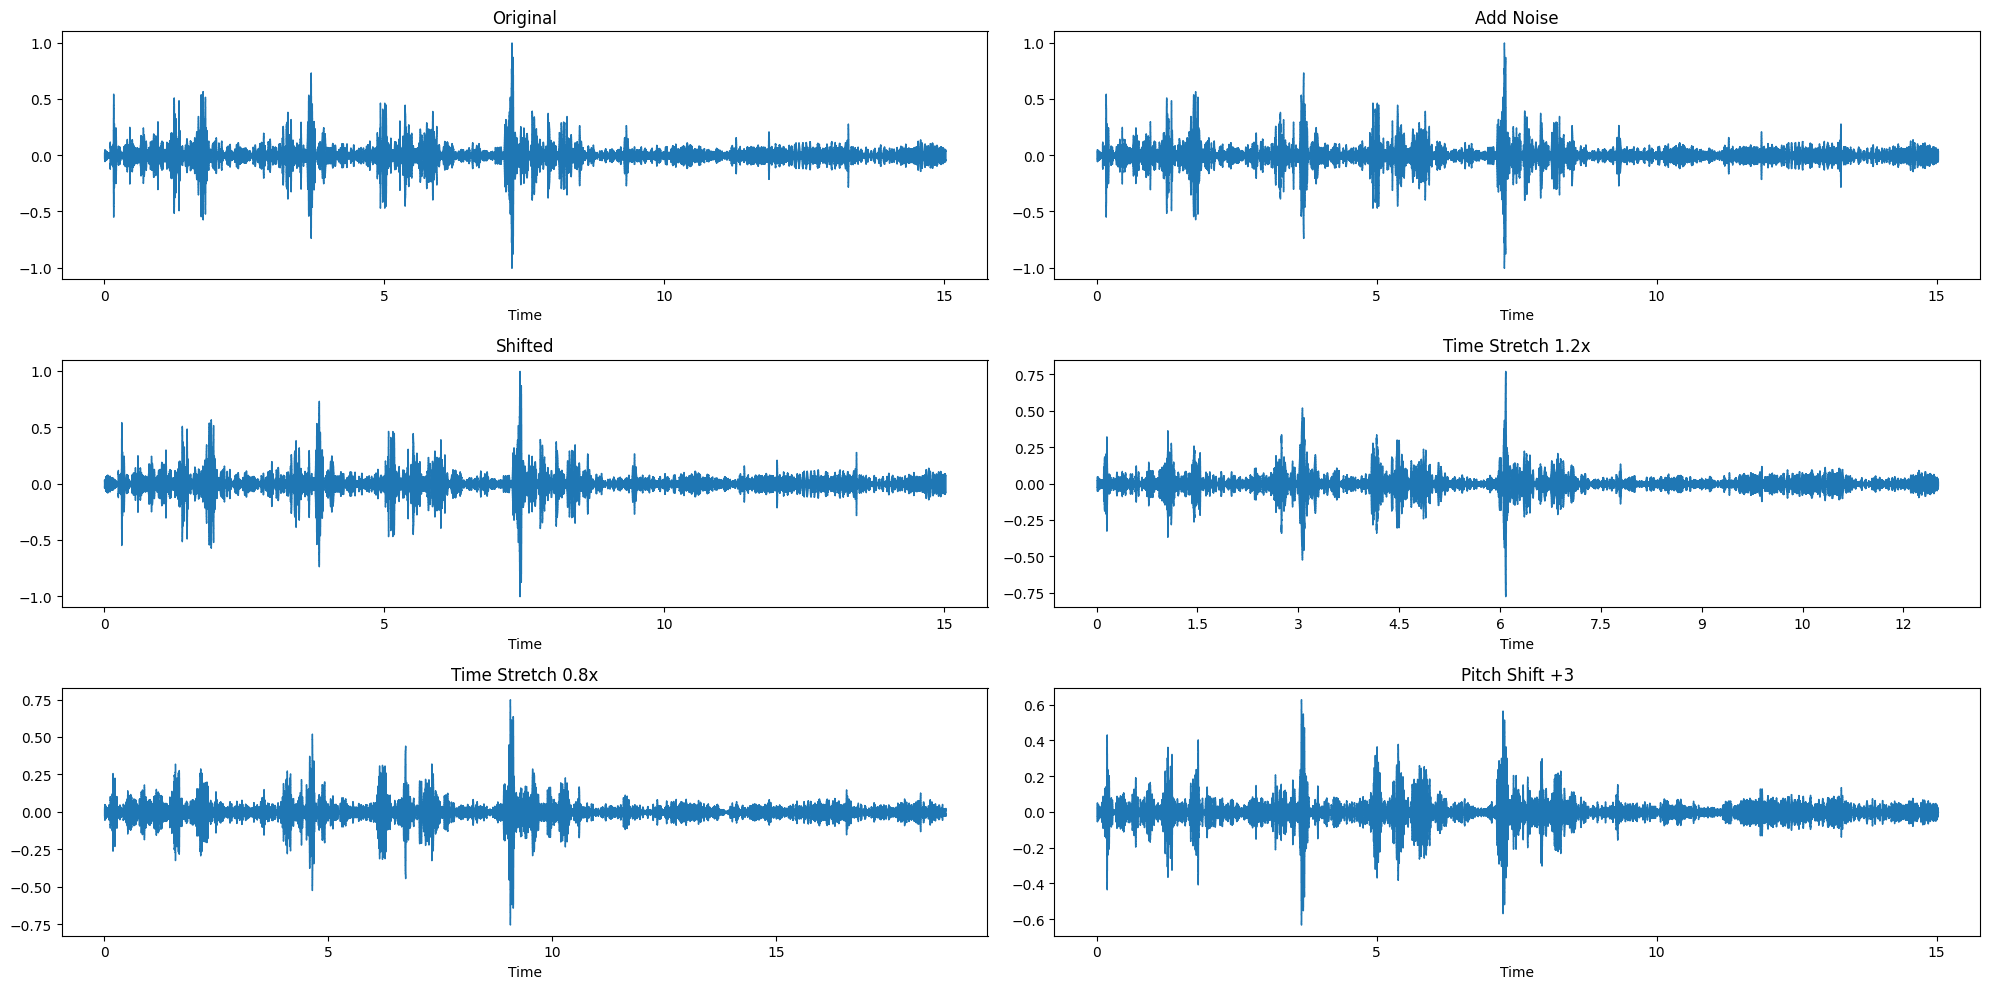

In [115]:
show_audio('/kaggle/input/respiratory-sound-database/Respiratory_Sound_Database/Respiratory_Sound_Database/audio_and_txt_files/104_1b1_Lr_sc_Litt3200.wav')


In [116]:
def show_audio_features(audio_path):
    y, sr = librosa.load(audio_path)

    # Augmentations
    y_noise = add_noise(y, 0.0008)
    y_shift = shift(y, 3200)
    y_stretch_1 = stretch(y, 1.2)
    y_stretch_2 = stretch(y, 0.8)
    y_pitch_shift = pitch_shift(y, sr, 3)

    # MFCC extraction
    mfcc_y = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=20)
    mfcc_noise = librosa.feature.mfcc(y=y_noise, sr=sr, n_mfcc=20)
    mfcc_shift = librosa.feature.mfcc(y=y_shift, sr=sr, n_mfcc=20)
    mfcc_stretch_1 = librosa.feature.mfcc(y=y_stretch_1, sr=sr, n_mfcc=20)
    mfcc_stretch_2 = librosa.feature.mfcc(y=y_stretch_2, sr=sr, n_mfcc=20)
    mfcc_pitch_shift = librosa.feature.mfcc(y=y_pitch_shift, sr=sr, n_mfcc=20)

    # Plot
    plt.figure(figsize=(20, 10))

    plt.subplot(3, 2, 1)
    librosa.display.specshow(mfcc_y, x_axis='time', sr=sr)
    plt.colorbar()
    plt.title('Original MFCC')

    plt.subplot(3, 2, 2)
    librosa.display.specshow(mfcc_noise, x_axis='time', sr=sr)
    plt.colorbar()
    plt.title('Noise MFCC')

    plt.subplot(3, 2, 3)
    librosa.display.specshow(mfcc_shift, x_axis='time', sr=sr)
    plt.colorbar()
    plt.title('Shift MFCC')

    plt.subplot(3, 2, 4)
    librosa.display.specshow(mfcc_stretch_1, x_axis='time', sr=sr)
    plt.colorbar()
    plt.title('Stretch 1.2 MFCC')

    plt.subplot(3, 2, 5)
    librosa.display.specshow(mfcc_stretch_2, x_axis='time', sr=sr)
    plt.colorbar()
    plt.title('Stretch 0.8 MFCC')

    plt.subplot(3, 2, 6)
    librosa.display.specshow(mfcc_pitch_shift, x_axis='time', sr=sr)
    plt.colorbar()
    plt.title('Pitch Shift MFCC')

    plt.tight_layout()
    plt.show()


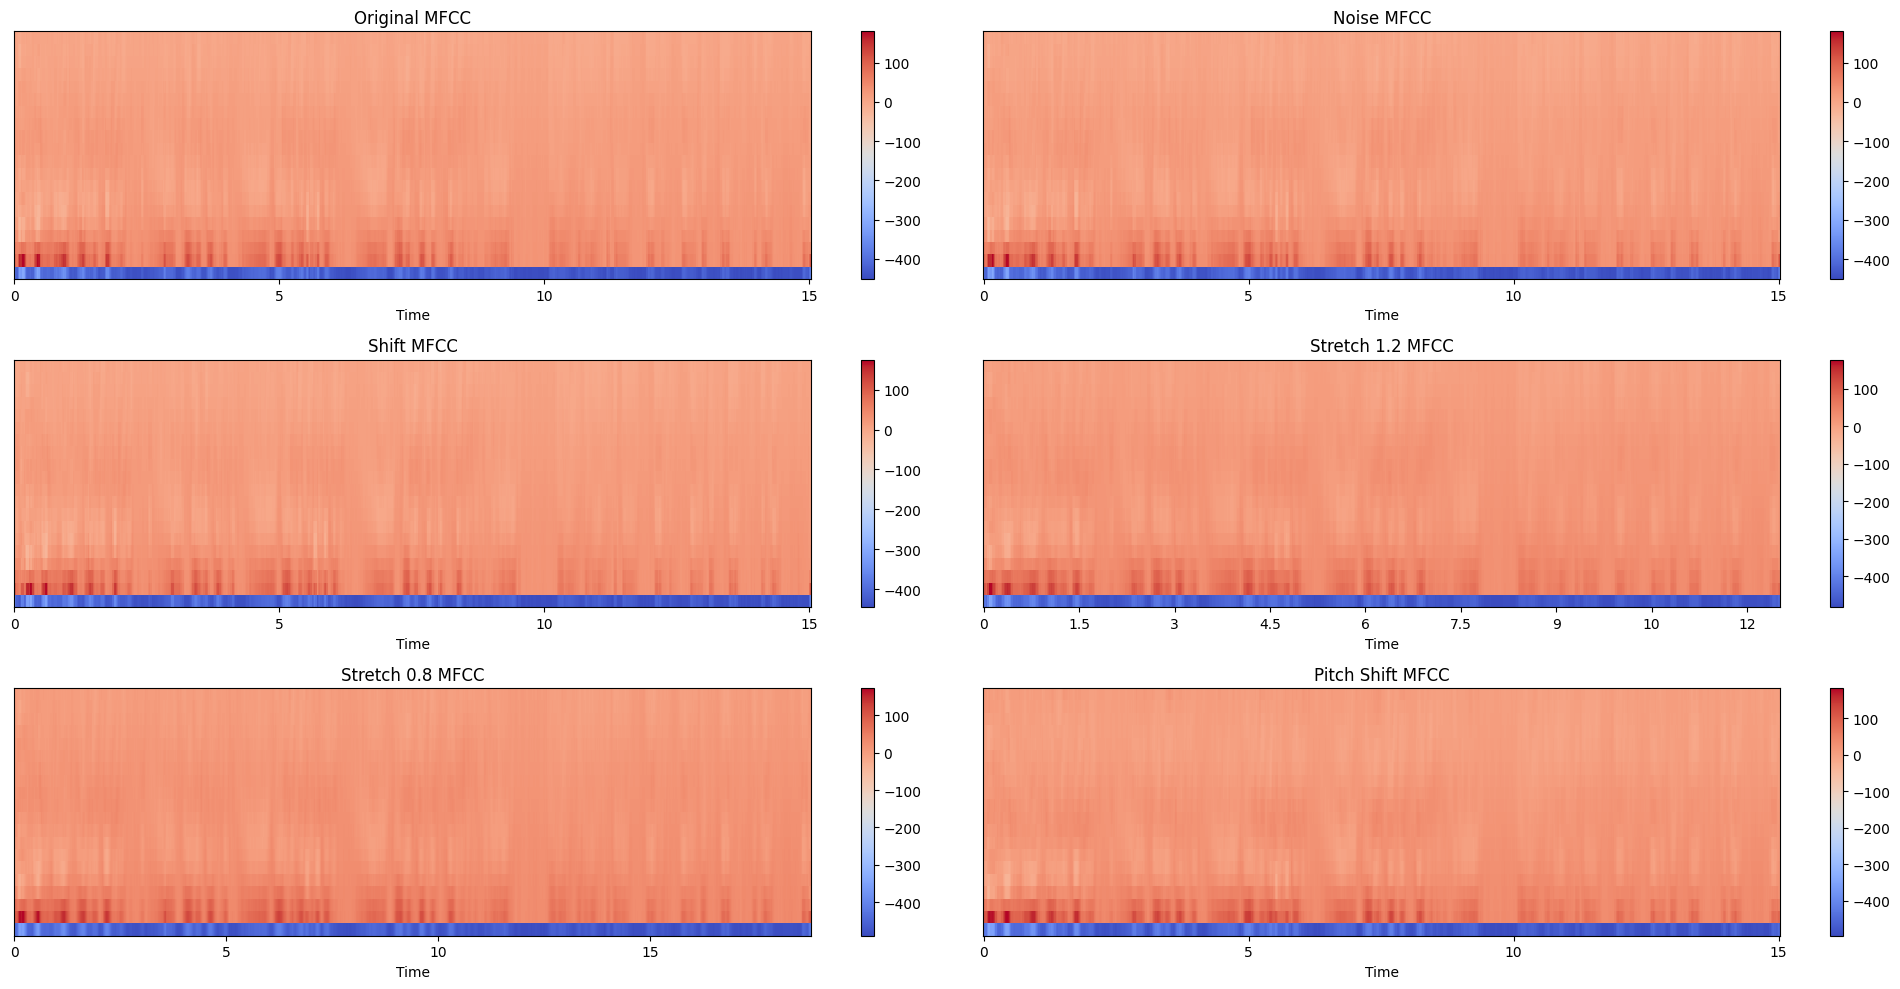

In [117]:
show_audio_features('/kaggle/input/respiratory-sound-database/Respiratory_Sound_Database/Respiratory_Sound_Database/audio_and_txt_files/104_1b1_Lr_sc_Litt3200.wav')

In [118]:
!pip install resampy


In [119]:
def mfccs_feature_exteraction(dir_):
    '''
        Extract MFCC feature from the Sound data from the audio data. 
        Augmentation of sound data by adding Noise, streaching and shifting.
        50 features are extracted from each audio data and used to train the model. 
        Also, we remove .wav files with patient_id 103,108, and 115 to solve data imbalance, because they have unique lables. 
        
        Args: dir_: Input directory to the Sound input file.
        
        Returns:
            X_data: Array of features extracted from the sound file.
            y_data: Array of target Labels.
    '''
    X_=[]
    y_=[]
    
    COPD=[]
    copd_count=0
    
    data = diagnosis_df
    features = 52
    
    for soundDir in (os.listdir(dir_)):
        if soundDir[-3:]=='wav'and soundDir[:3]!='103'and soundDir[:3]!='108'and soundDir[:3]!='115':

            p = list(data[data['patient_id']==int(soundDir[:3])]['disease'])[0]
            if (p=='COPD'):
                if (soundDir[:6] in COPD) and copd_count<2:
                    data_x, sampling_rate = librosa.load(dir_+soundDir,res_type='kaiser_fast')
                    mfccs = np.mean(librosa.feature.mfcc(y=data_x, sr=sampling_rate, n_mfcc=features).T,axis=0)
                    COPD.append(soundDir[:6])
                    copd_count+=1
                    X_.append(mfccs)
                    y_.append(list(data[data['patient_id']==int(soundDir[:3])]['disease'])[0])
                    
                if (soundDir[:6] not in COPD):
                    data_x, sampling_rate = librosa.load(dir_+soundDir,res_type='kaiser_fast')
                    mfccs = np.mean(librosa.feature.mfcc(y=data_x, sr=sampling_rate, n_mfcc=features).T,axis=0)
                    COPD.append(soundDir[:6])
                    copd_count=0
                    X_.append(mfccs)
                    y_.append(list(data[data['patient_id']==int(soundDir[:3])]['disease'])[0])
                
            if (p!='COPD'):
                if ((p == 'Bronchiectasis') or (p == 'Bronchiolitis')):
                    data_x, sampling_rate = librosa.load(dir_+soundDir,res_type='kaiser_fast')
                    mfccs = np.mean(librosa.feature.mfcc(y=data_x, sr=sampling_rate, n_mfcc=features).T,axis=0)
                    X_.append(mfccs)
                    y_.append('Bronchiolitis')
            
                    data_noise = add_noise(data_x,0.001)
                    mfccs_noise = np.mean(librosa.feature.mfcc(y=data_noise, sr=sampling_rate, n_mfcc=features).T,axis=0)
                    X_.append(mfccs_noise)
                    y_.append('Bronchiolitis')

                    data_shift = shift(data_x,1600)
                    mfccs_shift = np.mean(librosa.feature.mfcc(y=data_shift, sr=sampling_rate, n_mfcc=features).T,axis=0)
                    X_.append(mfccs_shift)
                    y_.append('Bronchiolitis')
                    
                    data_stretch = stretch(data_x,1.2)
                    mfccs_stretch = np.mean(librosa.feature.mfcc(y=data_stretch, sr=sampling_rate, n_mfcc=features).T,axis=0)
                    X_.append(mfccs_stretch)
                    y_.append('Bronchiolitis')
                    
                    data_stretch_2 = stretch(data_x,0.8)
                    mfccs_stretch_2 = np.mean(librosa.feature.mfcc(y=data_stretch_2, sr=sampling_rate, n_mfcc=features).T,axis=0)
                    X_.append(mfccs_stretch_2)
                    y_.append('Bronchiolitis')
                    
                    data_pitch_shift = pitch_shift(data_x,3)
                    mfccs_stretch = np.mean(librosa.feature.melspectrogram(y=data_pitch_shift, sr=sampling_rate, n_mels=features).T,axis=0)
                    X_.append(mfccs_stretch)
                    y_.append('Bronchiolitis')
                    
                else: 
                    data_x, sampling_rate = librosa.load(dir_+soundDir,res_type='kaiser_fast')
                    mfccs = np.mean(librosa.feature.mfcc(y=data_x, sr=sampling_rate, n_mfcc=features).T,axis=0)
                    X_.append(mfccs)
                    y_.append(list(data[data['patient_id']==int(soundDir[:3])]['disease'])[0])
            
                    data_noise = add_noise(data_x,0.001)
                    mfccs_noise = np.mean(librosa.feature.mfcc(y=data_noise, sr=sampling_rate, n_mfcc=features).T,axis=0)
                    X_.append(mfccs_noise)
                    y_.append(p)

                    data_shift = shift(data_x,1600)
                    mfccs_shift = np.mean(librosa.feature.mfcc(y=data_shift, sr=sampling_rate, n_mfcc=features).T,axis=0)
                    X_.append(mfccs_shift)
                    y_.append(p)
                    
                    data_stretch = stretch(data_x,1.2)
                    mfccs_stretch = np.mean(librosa.feature.mfcc(y=data_stretch, sr=sampling_rate, n_mfcc=features).T,axis=0)
                    X_.append(mfccs_stretch)
                    y_.append(p)
                    
                    data_stretch_2 = stretch(data_x,0.8)
                    mfccs_stretch_2 = np.mean(librosa.feature.mfcc(y=data_stretch_2, sr=sampling_rate, n_mfcc=features).T,axis=0)
                    X_.append(mfccs_stretch_2)
                    y_.append(p)
                    
                    data_pitch_shift = pitch_shift(data_x,3)
                    mfccs_stretch = np.mean(librosa.feature.melspectrogram(y=data_pitch_shift, sr=sampling_rate, n_mels=features).T,axis=0)
                    X_.append(mfccs_stretch)
                    y_.append(p)
                    
                    
                
    X_data = np.array(X_)
    y_data = np.array(y_)

    
    return X_data, y_data 

In [120]:
def mfccs_feature_exteraction(dir_):
    '''
        Extract MFCC feature from the Sound data from the audio data. 
        Augmentation of sound data by adding Noise, streaching and shifting.
        50 features are extracted from each audio data and used to train the model. 
        Also, we remove .wav files with patient_id 103,108, and 115 to solve data imbalance, because they have unique lables. 
        
        Args: dir_: Input directory to the Sound input file.
        
        Returns:
            X_data: Array of features extracted from the sound file.
            y_data: Array of target Labels.
    '''
    X_ = []
    y_ = []
    
    COPD = []
    copd_count = 0
    
    data = diagnosis_df
    features = 52
    
    # Διατρέχουμε τα αρχεία ήχου στον φάκελο
    for soundDir in os.listdir(dir_):
        if soundDir[-3:] == 'wav' and soundDir[:3] not in ['103', '108', '115']:  # Αγνοούμε αυτά τα ids

            # Λήψη της ασθένειας από το CSV
            p = list(data[data['patient_id'] == int(soundDir[:3])]['disease'])[0]
            
            if p == 'COPD':
                if soundDir[:6] in COPD and copd_count < 2:
                    data_x, sampling_rate = load_audio_with_resample(dir_ + soundDir, 16000)  # Αναγνώριση με το νέο sample rate
                    mfccs = np.mean(librosa.feature.mfcc(y=data_x, sr=sampling_rate, n_mfcc=features).T, axis=0)
                    COPD.append(soundDir[:6])
                    copd_count += 1
                    X_.append(mfccs)
                    y_.append(p)
                elif soundDir[:6] not in COPD:
                    data_x, sampling_rate = load_audio_with_resample(dir_ + soundDir, 16000)
                    mfccs = np.mean(librosa.feature.mfcc(y=data_x, sr=sampling_rate, n_mfcc=features).T, axis=0)
                    COPD.append(soundDir[:6])
                    copd_count = 0
                    X_.append(mfccs)
                    y_.append(p)
            
            else:
                # Για άλλες ασθένειες όπως Bronchiectasis, Bronchiolitis
                if p in ['Bronchiectasis', 'Bronchiolitis']:
                    data_x, sampling_rate = load_audio_with_resample(dir_ + soundDir, 16000)
                    mfccs = np.mean(librosa.feature.mfcc(y=data_x, sr=sampling_rate, n_mfcc=features).T, axis=0)
                    X_.append(mfccs)
                    y_.append('Bronchiolitis')
                    
                    # Εφαρμογή augmentations
                    if np.random.rand() < 0.3:  # Περιορισμός του pitch shift
                        data_pitch_shift = pitch_shift(data_x, sampling_rate, 3)
                        mfccs_pitch_shift = np.mean(librosa.feature.mfcc(y=data_pitch_shift, sr=sampling_rate, n_mfcc=features).T, axis=0)
                        X_.append(mfccs_pitch_shift)
                        y_.append('Bronchiolitis')

                    if np.random.rand() < 0.3:  # Περιορισμός του time stretching
                        data_stretch = stretch(data_x, 1.2)
                        mfccs_stretch = np.mean(librosa.feature.mfcc(y=data_stretch, sr=sampling_rate, n_mfcc=features).T, axis=0)
                        X_.append(mfccs_stretch)
                        y_.append('Bronchiolitis')
                    
                    if np.random.rand() < 0.3:  # Περιορισμός του shifting
                        data_shift = shift(data_x, 1600)
                        mfccs_shift = np.mean(librosa.feature.mfcc(y=data_shift, sr=sampling_rate, n_mfcc=features).T, axis=0)
                        X_.append(mfccs_shift)
                        y_.append('Bronchiolitis')
                
                else:
                    # Εξαγωγή κανονικών MFCCs για άλλες ασθένειες
                    data_x, sampling_rate = load_audio_with_resample(dir_ + soundDir, 16000)
                    mfccs = np.mean(librosa.feature.mfcc(y=data_x, sr=sampling_rate, n_mfcc=features).T, axis=0)
                    X_.append(mfccs)
                    y_.append(p)
                    
                    # Αυξήσεις (augmentations)
                    if np.random.rand() < 0.3:  # Περιορισμός του pitch shift
                        data_pitch_shift = pitch_shift(data_x, sampling_rate, 3)
                        mfccs_pitch_shift = np.mean(librosa.feature.mfcc(y=data_pitch_shift, sr=sampling_rate, n_mfcc=features).T, axis=0)
                        X_.append(mfccs_pitch_shift)
                        y_.append(p)

                    if np.random.rand() < 0.3:  # Περιορισμός του time stretching
                        data_stretch = stretch(data_x, 1.2)
                        mfccs_stretch = np.mean(librosa.feature.mfcc(y=data_stretch, sr=sampling_rate, n_mfcc=features).T, axis=0)
                        X_.append(mfccs_stretch)
                        y_.append(p)
                    
                    if np.random.rand() < 0.3:  # Περιορισμός του shifting
                        data_shift = shift(data_x, 1600)
                        mfccs_shift = np.mean(librosa.feature.mfcc(y=data_shift, sr=sampling_rate, n_mfcc=features).T, axis=0)
                        X_.append(mfccs_shift)
                        y_.append(p)
    
    X_data = np.array(X_)
    y_data = np.array(y_)
    
    return X_data, y_data


In [121]:
x_mfccs, y = mfccs_feature_exteraction(audio_data)

In [122]:
def augmented_lables_count(lables):
    unique, counts = np.unique(lables, return_counts=True)
    data_count = dict(zip(unique, counts))

    data = data_count

    courses = list(data.keys())
    values = list(data.values())

    fig = plt.figure(figsize = (10, 5))

    # creating the bar plot
    plt.bar(courses, values, color =['orange','green','blue','red','yellow','black'],
            width = 0.4)

    plt.xlabel("Diseases")
    plt.ylabel("Count")
    plt.title("Count of each disease")
    plt.show()

    print (data_count)

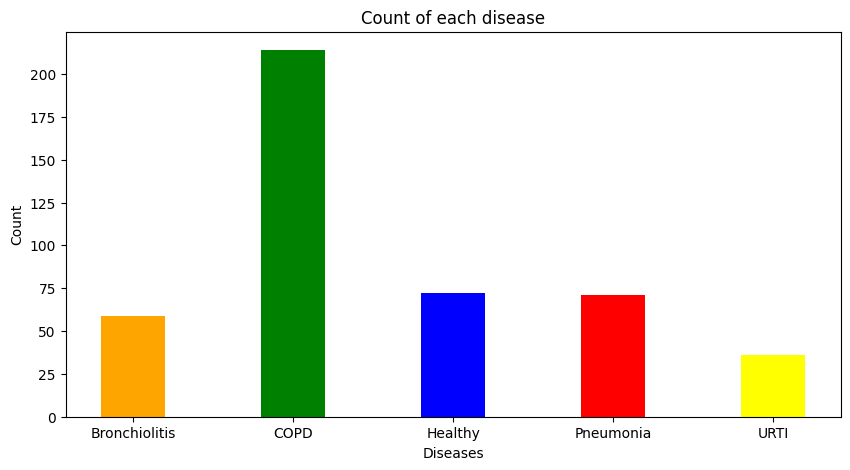

{'Bronchiolitis': 59, 'COPD': 214, 'Healthy': 72, 'Pneumonia': 71, 'URTI': 36}


In [123]:
augmented_lables_count(y)

In [124]:
y_data_encode = y.reshape(y.shape[0],1)
y_data_encode = np.where(y_data_encode == 'COPD',np.array([1,0,0,0,0]).reshape(1,5) , y_data_encode)
y_data_encode = np.where(y_data_encode == 'Bronchiolitis',np.array([0,1,0,0,0]).reshape(1,5) , y_data_encode)
y_data_encode = np.where(y_data_encode == 'Pneumonia',np.array([0,0,1,0,0]).reshape(1,5) , y_data_encode)
y_data_encode = np.where(y_data_encode == 'URTI',np.array([0,0,0,1,0]).reshape(1,5) , y_data_encode)
y_data_encode = np.where(y_data_encode == 'Healthy',np.array([0,0,0,0,1]).reshape(1,5) , y_data_encode)

Y_data = y_data_encode.astype('float64')
mfccs_features = np.array(x_mfccs)
lables = np.array(Y_data)

mfccs_features.shape , lables.shape

((452, 52), (452, 5))

In [125]:
# Υποθέτουμε ότι τα mfccs_features και y είναι τα δεδομένα και οι ετικέτες
mfcc_train, mfcc_val, labels_train, labels_val = train_test_split(mfccs_features, y, test_size=0.175, random_state=10)
mfcc_train, mfcc_test, labels_train, labels_test = train_test_split(mfcc_train, labels_train, test_size=0.075, random_state=10)

print(mfcc_train.shape, mfcc_val.shape, mfcc_test.shape)
print(labels_train.shape, labels_val.shape, labels_test.shape)


(344, 52) (80, 52) (28, 52)
(344,) (80,) (28,)


In [126]:
mfcc_train, mfcc_val, lables_train, lables_val  = train_test_split(mfccs_features, lables, test_size=0.175, random_state=10)
mfcc_train, mfcc_test, lables_train, lables_test = train_test_split(mfcc_train, lables_train, test_size=0.075, random_state=10)

print (mfcc_train.shape, mfcc_val.shape, mfcc_test.shape)
print (lables_train.shape, lables_val.shape, lables_test.shape)

(344, 52) (80, 52) (28, 52)
(344, 5) (80, 5) (28, 5)


In [127]:
from keras.layers import Input, Conv1D, LSTM, GRU, Dense, Dropout, MaxPooling1D, BatchNormalization, LeakyReLU
from keras.models import Model
from keras.layers import add
import matplotlib.pyplot as plt

def plot_loss_curves(history):
    """
    Returns separate loss curves for training and validation metrics.
    Args:
        history: TensorFlow model History object (see: https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/History)
    """ 
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    
    accuracy = history.history['accuracy']
    val_accuracy = history.history['val_accuracy']

    epochs = range(len(history.history['loss']))

    # Plot loss
    plt.figure(figsize=(10, 5))
    plt.plot(epochs, loss, label='training_loss')
    plt.plot(epochs, val_loss, label='val_loss')
    plt.title('Loss')
    plt.xlabel('Epochs')
    plt.legend()
    plt.grid()

    # Plot accuracy
    plt.figure(figsize=(10, 5))
    plt.plot(epochs, accuracy, label='training_accuracy')
    plt.plot(epochs, val_accuracy, label='val_accuracy')
    plt.title('Accuracy')
    plt.xlabel('Epochs')
    plt.legend()
    plt.grid()
    plt.show()

# Αύξηση των διαστάσεων των δεδομένων
x_train_gru = np.expand_dims(mfcc_train, axis=1)
x_val_gru = np.expand_dims(mfcc_val, axis=1)
x_test_gru = np.expand_dims(mfcc_test, axis=1)

y_train_gru = np.expand_dims(lables_train, axis=1)
y_val_gru = np.expand_dims(lables_val, axis=1)
y_test_gru = np.expand_dims(lables_test, axis=1)

Input_Sample = Input(shape=(1, 52))

# Conv1D Layer
model_conv = Conv1D(256, kernel_size=5, strides=1, padding='same', activation='relu')(Input_Sample)
model_conv = MaxPooling1D(pool_size=2, strides=2, padding='same')(model_conv)
model_conv = BatchNormalization()(model_conv)

# 2nd Conv1D Layer
model_conv = Conv1D(512, kernel_size=5, strides=1, padding='same', activation='relu')(model_conv)
model_conv = MaxPooling1D(pool_size=2, strides=2, padding='same')(model_conv)
model_conv = BatchNormalization()(model_conv)

# GRU Layers
model_2_1 = GRU(32, return_sequences=True, activation='tanh', go_backwards=True)(model_conv)
model_2 = GRU(128, return_sequences=True, activation='tanh', go_backwards=True)(model_2_1)

model_3 = GRU(64, return_sequences=True, activation='tanh', go_backwards=True)(model_conv)
model_3 = GRU(128, return_sequences=True, activation='tanh', go_backwards=True)(model_3)

model_x = GRU(64, return_sequences=True, activation='tanh', go_backwards=True)(model_conv)
model_x = GRU(128, return_sequences=True, activation='tanh', go_backwards=True)(model_x)

# Adding the layers
model_add_1 = add([model_3, model_2, model_x])

model_5 = GRU(128, return_sequences=True, activation='tanh', go_backwards=True)(model_add_1)
model_5 = GRU(32, return_sequences=True, activation='tanh', go_backwards=True)(model_5)

model_6 = GRU(64, return_sequences=True, activation='tanh', go_backwards=True)(model_add_1)
model_6 = GRU(32, return_sequences=True, activation='tanh', go_backwards=True)(model_6)

model_add_2 = add([model_5, model_6, model_2_1])

# Dense Layers
model_7 = Dense(32, activation=None)(model_add_2)
model_7 = LeakyReLU()(model_7)
model_7 = Dense(128, activation=None)(model_7)
model_7 = LeakyReLU()(model_7)

model_9 = Dense(64, activation=None)(model_add_2)
model_9 = LeakyReLU()(model_9)
model_9 = Dense(128, activation=None)(model_9)
model_9 = LeakyReLU()(model_9)

model_add_3 = add([model_7, model_9])

model_10 = Dense(64, activation=None)(model_add_3)
model_10 = LeakyReLU()(model_10)

model_10 = Dense(32, activation=None)(model_10)
model_10 = LeakyReLU()(model_10)

model_10 = Dense(5, activation="softmax")(model_10)

gru_model = Model(inputs=Input_Sample, outputs=model_10)

# Summary of the model
gru_model.summary()


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1             │ (None, 1, 52)          │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1d_2 (Conv1D)         │ (None, 1, 256)         │         66,816 │ input_layer_1[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling1d_2           │ (None, 1, 256)         │              0 │ conv1d_2[0][0]         │
│ (MaxPooling1D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_2     │ (None, 1, 256)         │          1,024 │ max_pooling1d_2[0][0]  │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1d_3 (Conv1D)         │ (None, 1, 512)         │        655,872 │ batch_normalization_2… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling1d_3           │ (None, 1, 512)         │              0 │ conv1d_3[0][0]         │
│ (MaxPooling1D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_3     │ (None, 1, 512)         │          2,048 │ max_pooling1d_3[0][0]  │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ gru_12 (GRU)              │ (None, 1, 64)          │        110,976 │ batch_normalization_3… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ gru_10 (GRU)              │ (None, 1, 32)          │         52,416 │ batch_normalization_3… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ gru_14 (GRU)              │ (None, 1, 64)          │        110,976 │ batch_normalization_3… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ gru_13 (GRU)              │ (None, 1, 128)         │         74,496 │ gru_12[0][0]           │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ gru_11 (GRU)              │ (None, 1, 128)         │         62,208 │ gru_10[0][0]           │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ gru_15 (GRU)              │ (None, 1, 128)         │         74,496 │ gru_14[0][0]           │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ add_3 (Add)               │ (None, 1, 128)         │              0 │ gru_13[0][0],          │
│                           │                        │                │ gru_11[0][0],          │
│                           │                        │                │ gru_15[0][0]           │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ gru_16 (GRU)              │ (None, 1, 128)         │         99,072 │ add_3[0][0]            │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ gru_18 (GRU)              │ (None, 1, 64)          │         37,248 │ add_3[0][0]            │
├──────────────────────

 Total params: 1,398,821 (5.34 MB)

 Trainable params: 1,397,285 (5.33 MB)

 Non-trainable params: 1,536 (6.00 KB)

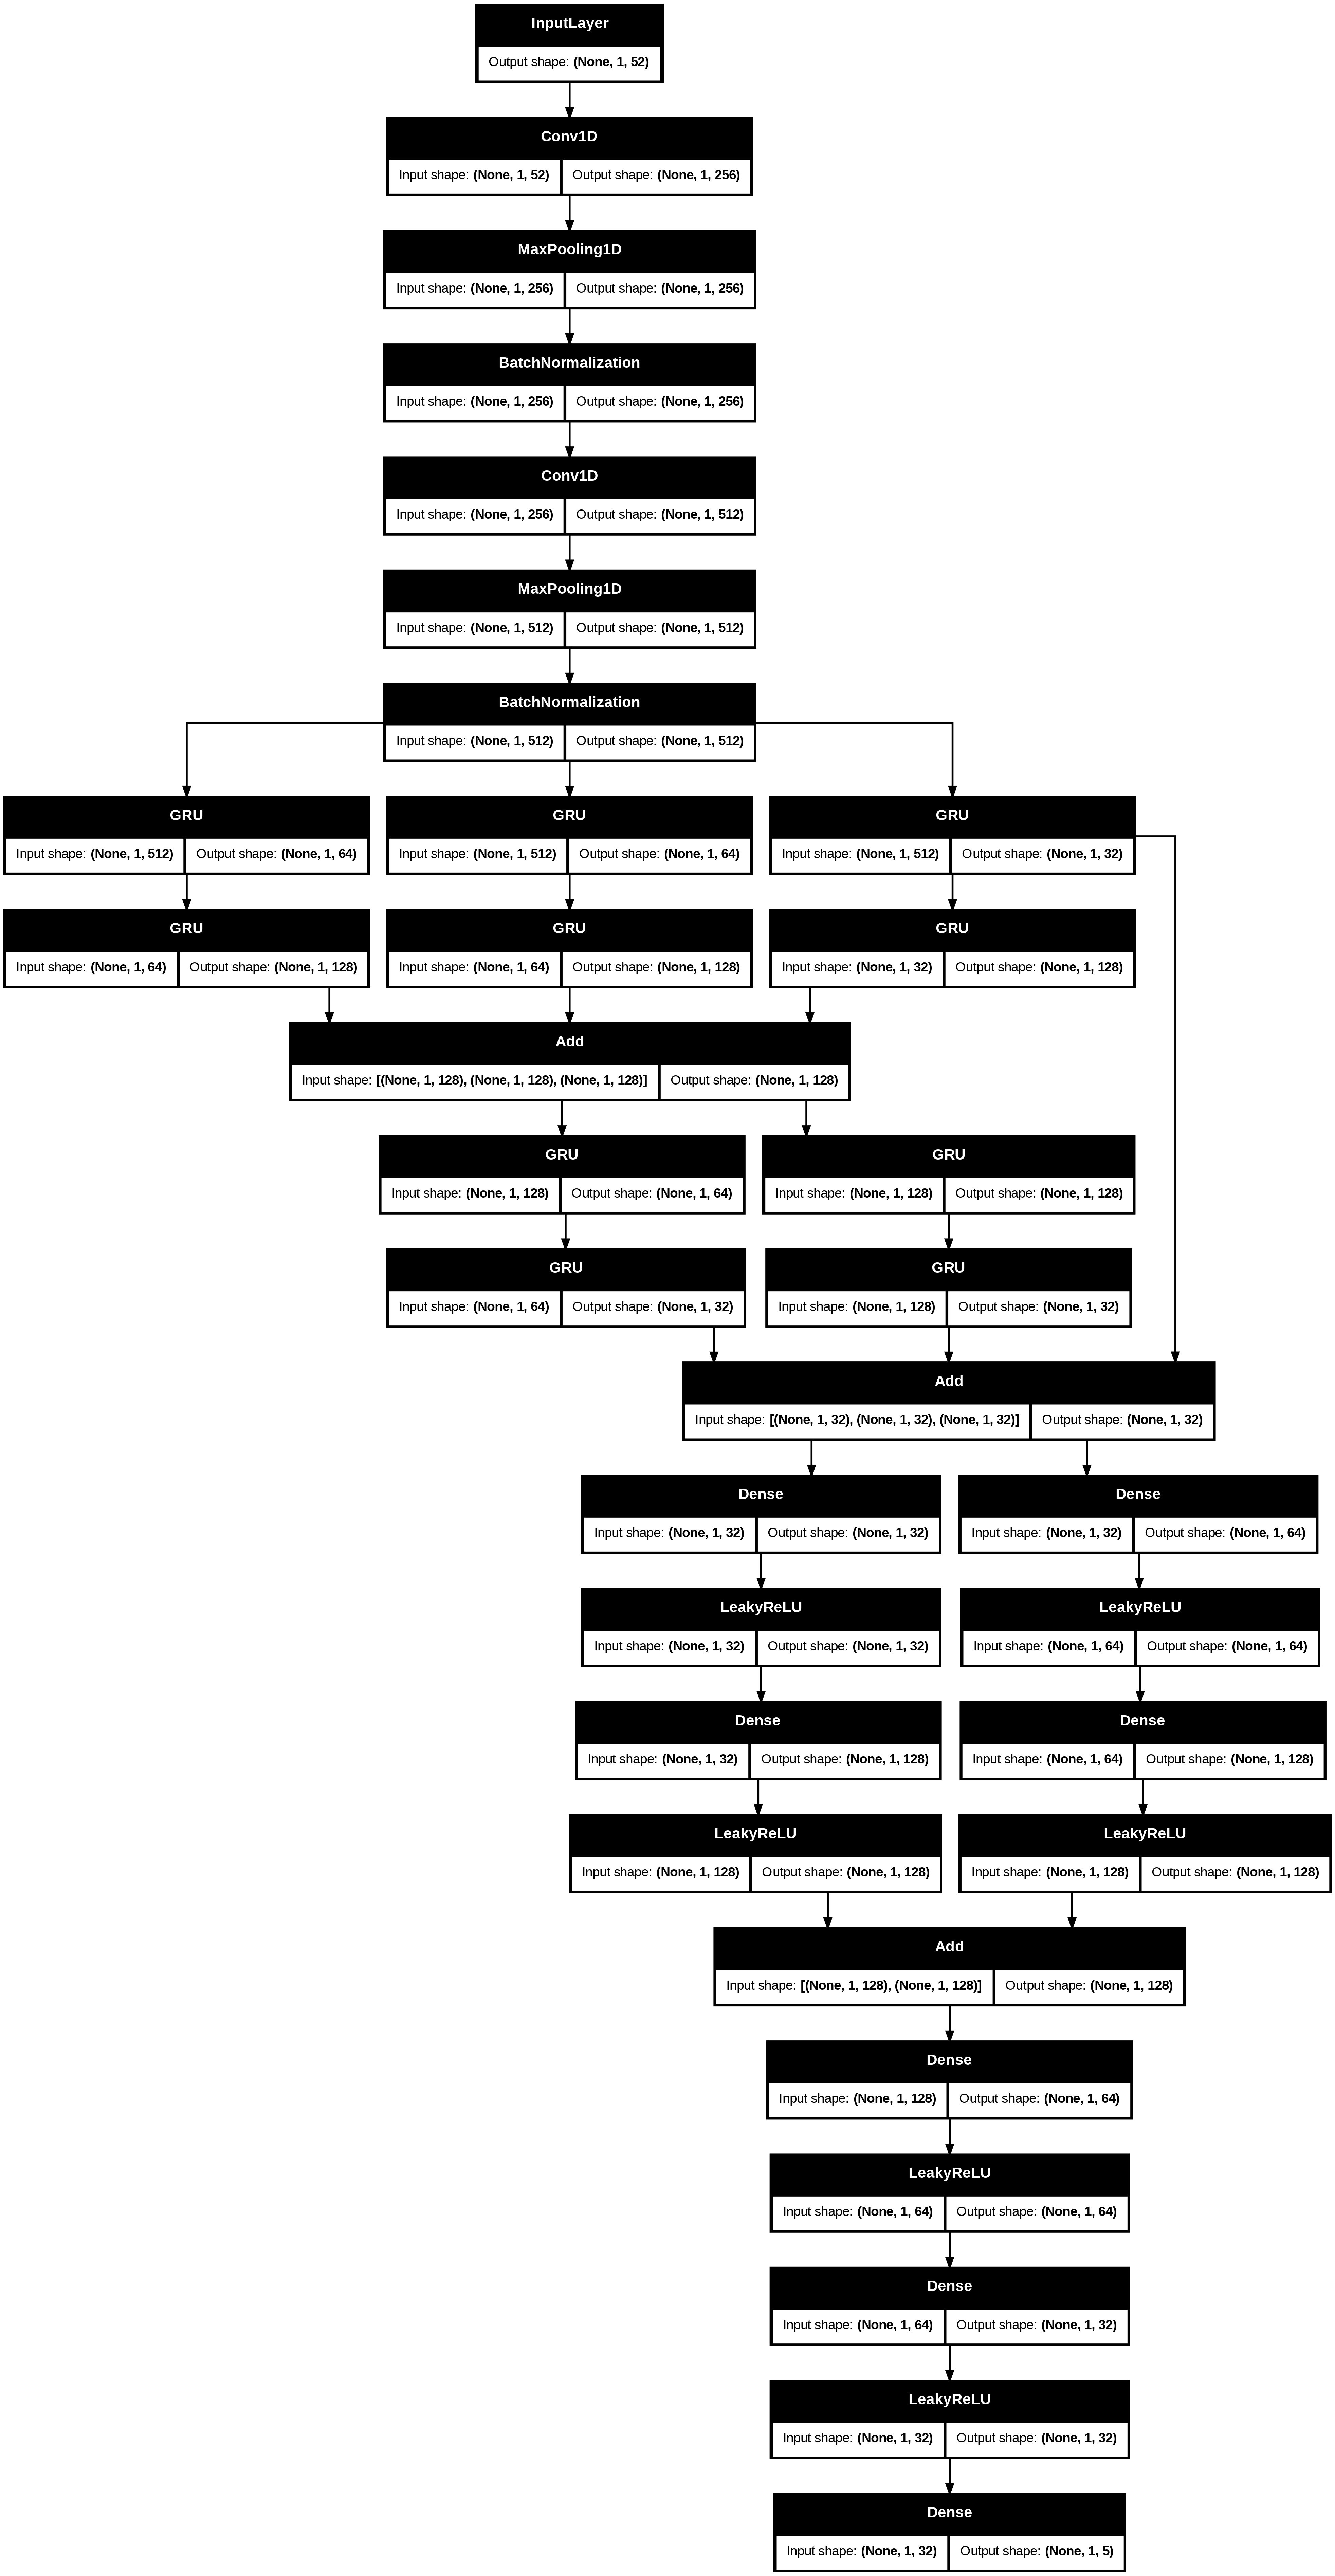

In [128]:
tf.keras.utils.plot_model(gru_model, "gru_model.png", show_shapes=True)

In [132]:
from keras.callbacks import EarlyStopping, ModelCheckpoint


# Συγκρότηση του μοντέλου
gru_model.compile(optimizer='adam', 
                  loss='categorical_crossentropy', 
                  metrics=['accuracy'])

# Εκπαίδευση του μοντέλου
history = gru_model.fit(x_train_gru, y_train_gru, batch_size=8, epochs=100, 
                        validation_data=(x_val_gru, y_val_gru), callbacks=cb)


Epoch 1/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 31s 99ms/step - accuracy: 0.5444 - loss: 1.3029 - val_accuracy: 0.1875 - val_loss: 1.6147
Epoch 2/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.5446 - loss: 1.1110 - val_accuracy: 0.2250 - val_loss: 1.6432
Epoch 3/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.5860 - loss: 1.0697 - val_accuracy: 0.5375 - val_loss: 1.1155
Epoch 4/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.6546 - loss: 0.8996 - val_accuracy: 0.5875 - val_loss: 1.1701
Epoch 5/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.6817 - loss: 0.9313 - val_accuracy: 0.6500 - val_loss: 0.9918
Epoch 6/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.6930 - loss: 0.8306 - val_accuracy: 0.5375 - val_loss: 1.1056
Epoch 7/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.6989 - loss: 0.7527 - val_accuracy: 0.5250 - val_loss: 1.1436
Epoch 8/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.6408 - loss: 0.8335 - val_accuracy: 0

11/11 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.9247 - loss: 0.2412


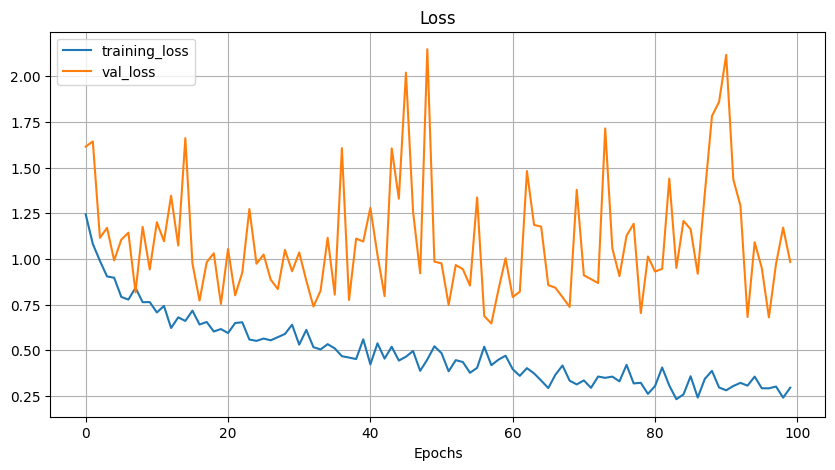

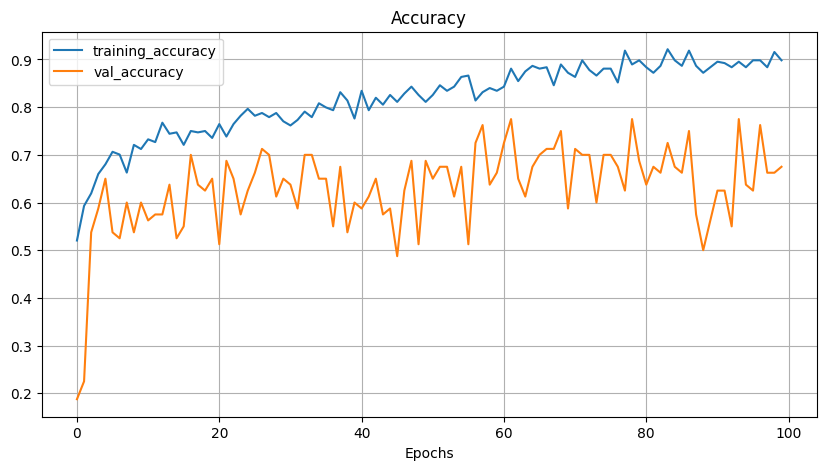

In [133]:
gru_model.evaluate(x_train_gru, y_train_gru)

plot_loss_curves(history)

In [ ]:
from sklearn.metrics import classification_report

# Υπολογισμός Precision, Recall και F1-Score
report = classification_report(y_testclass, classpreds)
print(report)


In [135]:
print(preds.shape)  # Θα πρέπει να είναι (N, K) όπου N = αριθμός δειγμάτων και K = αριθμός κατηγοριών
print(y_test_bin.shape)  # Θα πρέπει να είναι (N, K)


(29, 5)
(29, 5)


In [137]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
mfccs_features_scaled = scaler.fit_transform(mfccs_features)


In [138]:
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
import numpy as np

# Παράδειγμα δεδομένων - Αντικατέστησε με τα πραγματικά δεδομένα σου
mfccs_features = np.random.rand(29, 5)  # 29 δείγματα, 5 χαρακτηριστικά
labels = np.random.randint(0, 5, 29)  # 29 δείγματα με 5 κατηγορίες (0-4)

# Αν οι ετικέτες είναι one-hot encoded, μετατρέπουμε σε κατηγορίες
# Εδώ, για το παράδειγμα, οι labels ήδη είναι σε μορφή κατηγοριών
# Αν είχαν μορφή (29, 5), θα μπορούσαμε να χρησιμοποιήσουμε np.argmax(labels, axis=1)

# Δημιουργία του μοντέλου με γραμμικό πυρήνα
model = SVC(kernel='linear')

# Κάνουμε cross-validation με 5 folds
scores = cross_val_score(model, mfccs_features, labels, cv=5)

# Εκτύπωση των αποτελεσμάτων
print("Cross-Validation Scores: ", scores)
print("Mean Score: ", scores.mean())


Cross-Validation Scores:  [0.33333333 0.16666667 0.33333333 0.33333333 0.2       ]
Mean Score:  0.2733333333333333


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(


In [139]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

param_grid = {'C': [1, 10, 100], 'gamma': [0.001, 0.01, 0.1]}
grid_search = GridSearchCV(SVC(), param_grid, cv=5)
grid_search.fit(mfccs_features, labels)
print("Best parameters: ", grid_search.best_params_)


Best parameters:  {'C': 100, 'gamma': 0.1}


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(


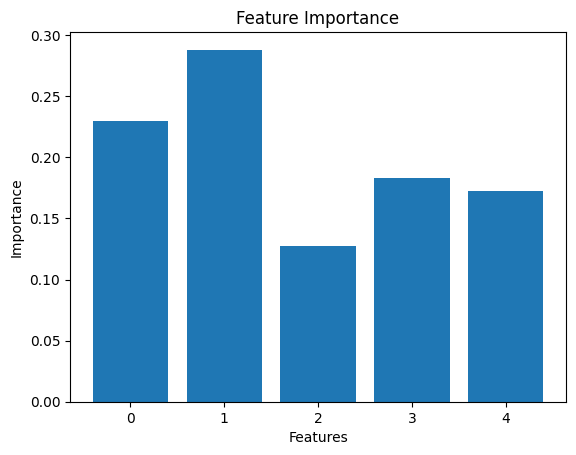

In [140]:
from sklearn.ensemble import RandomForestClassifier

# Εκπαίδευση ενός Random Forest
rf = RandomForestClassifier(n_estimators=100)
rf.fit(mfccs_features, labels)

# Αξιολόγηση σημαντικότητας χαρακτηριστικών
feature_importances = rf.feature_importances_
plt.bar(range(len(feature_importances)), feature_importances)
plt.title('Feature Importance')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.show()
